In [ ]:
import torch
from torch.autograd import Variable
import cv2
from data import BaseTransform, VOC_CLASSES as labelmap
from IPython.display import Image
from IPython.display import Video
from IPython.display import HTML
from ssd import build_ssd
import imageio

# Defining a function that will do the detections
def detect(frame, net, transform):
    height, width = frame.shape[:2]
    frame_t = transform(frame)[0]
    x = torch.from_numpy(frame_t).permute(2, 0, 1)
    x = Variable(x.unsqueeze(0))
    y = net(x)
    detections = y.data
    scale = torch.Tensor([width, height, width, height])
    # detections = [batch, number of classes, number of occurence, (score, x0, Y0, x1, y1)]
    for i in range(detections.size(1)):
        j = 0
        while detections[0, i, j, 0] >= 0.6:
            pt = (detections[0, i, j, 1:] * scale).numpy()
            cv2.rectangle(frame, (int(pt[0]), int(pt[1])), (int(pt[2]), int(pt[3])), (255, 0, 0), 2)
            cv2.putText(frame, labelmap[i - 1], (int(pt[0]), int(pt[1])), cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 255, 255), 2, cv2.LINE_AA)
            j += 1
    return frame

# Creating the SSD neural network
net = build_ssd('test')
net.load_state_dict(torch.load('ssd300_mAP_77.43_v2.pth', map_location = lambda storage, loc: storage))

# Creating the transformation
transform = BaseTransform(net.size, (104/256.0, 117/256.0, 123/256.0))

# Doing some Object Detection on a video
reader = imageio.get_reader('Horses.mp4')
fps = reader.get_meta_data()['fps']
writer = imageio.get_writer('output.mp4', fps = fps)
for i, frame in enumerate(reader):
    frame = detect(frame, net.eval(), transform)
    writer.append_data(frame)
    print(i)
writer.close()

# Input

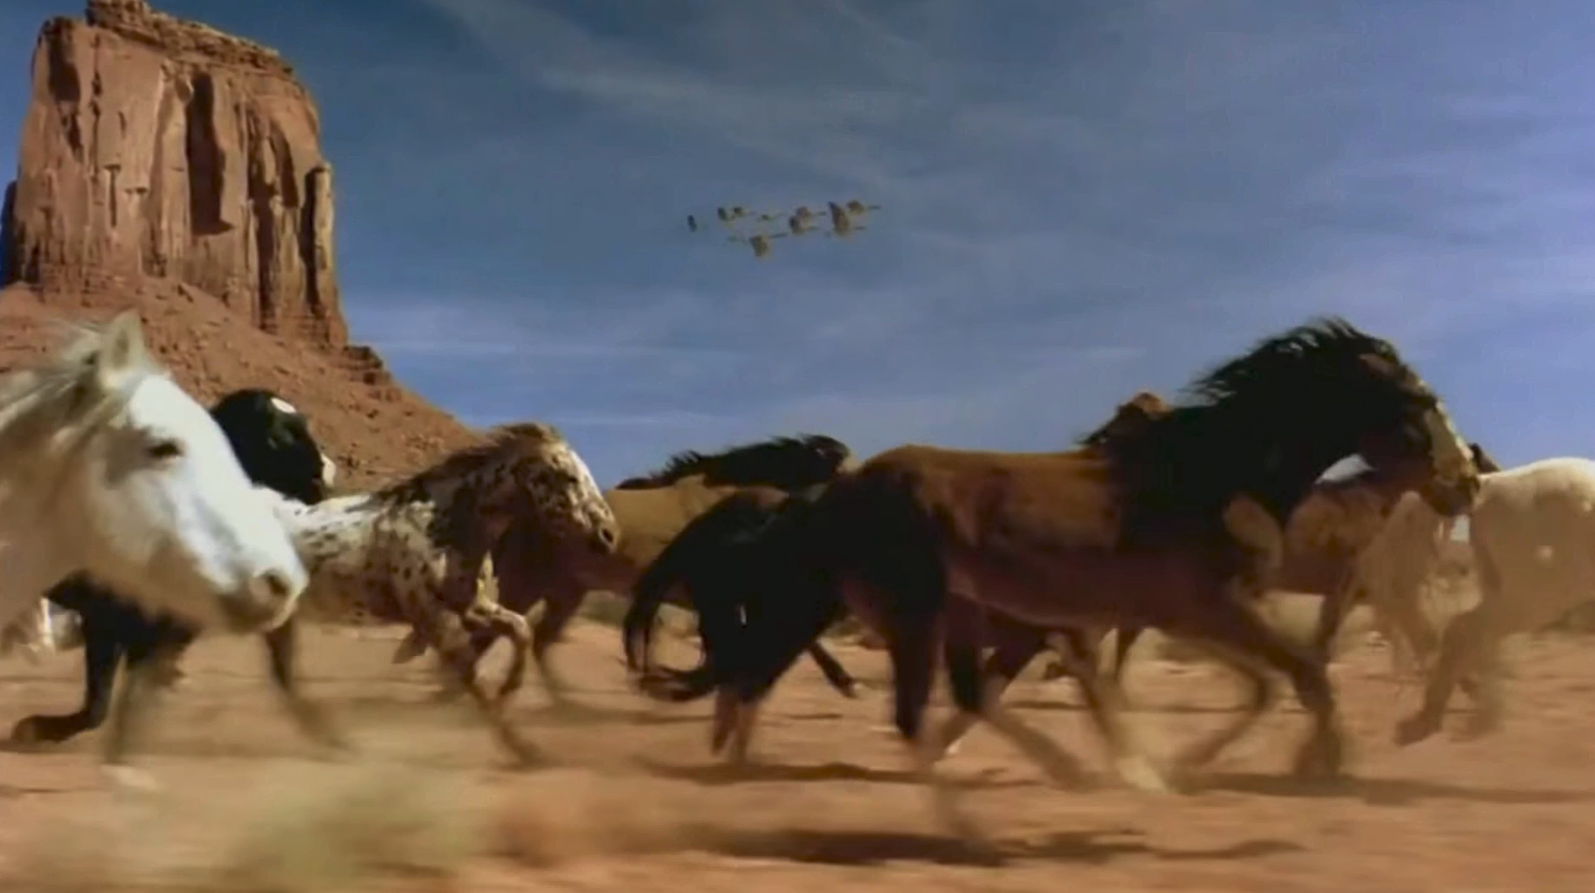

In [48]:
Image(filename='aza.png')

In [46]:
HTML('<iframe width="560" height="315" src="Horses.mp4" frameborder="0" allowfullscreen></iframe>')

# Output

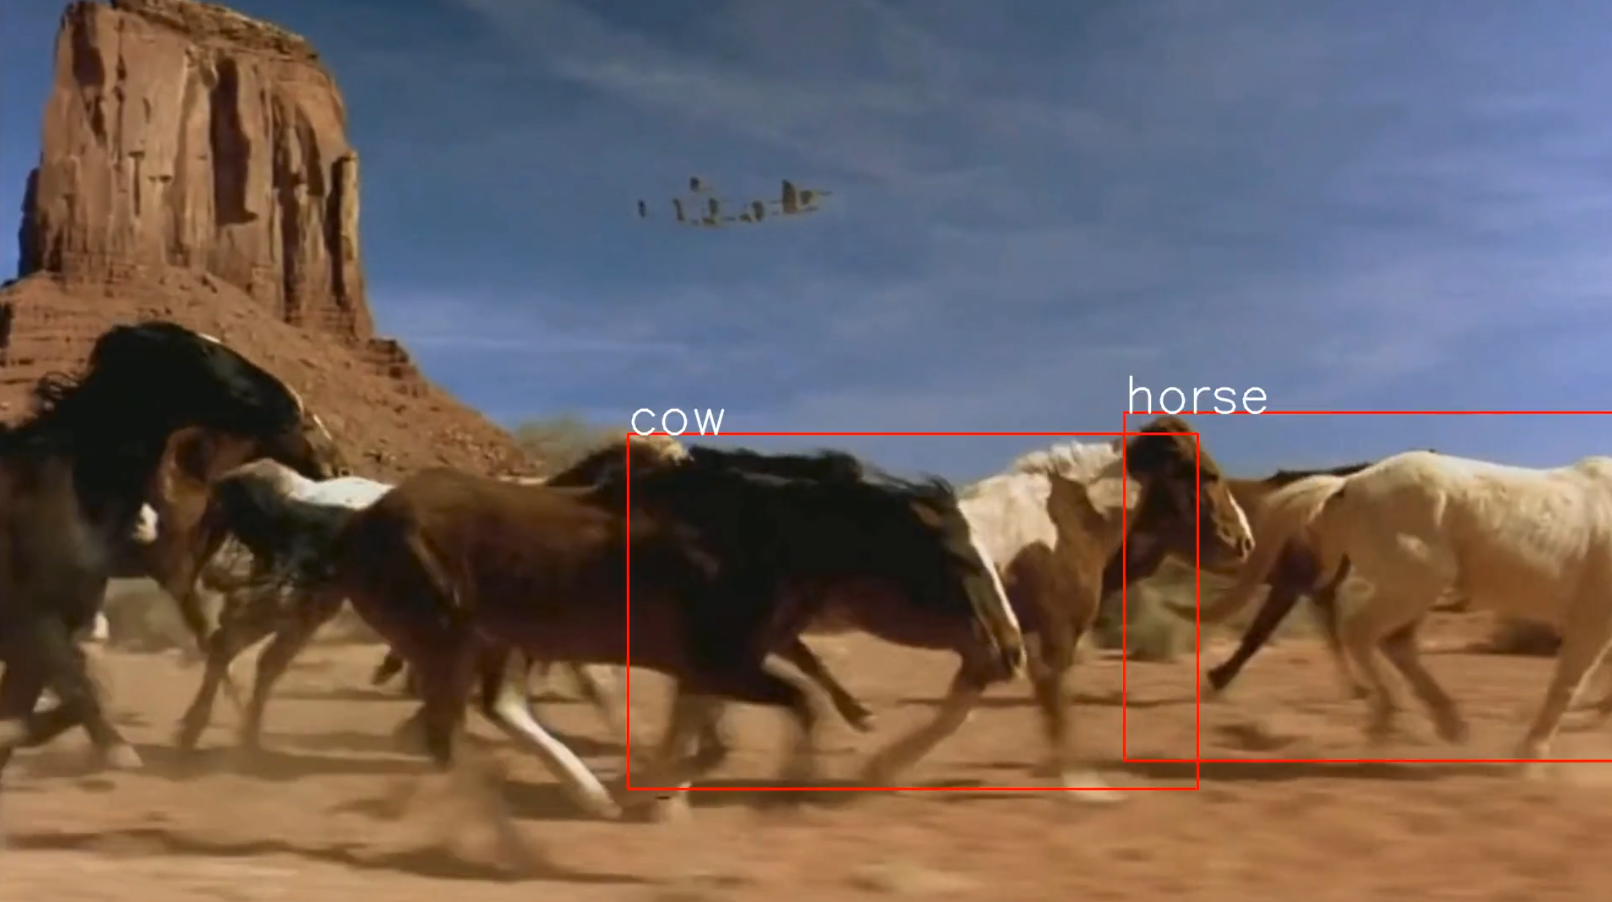

In [49]:
Image(filename='az1.png')

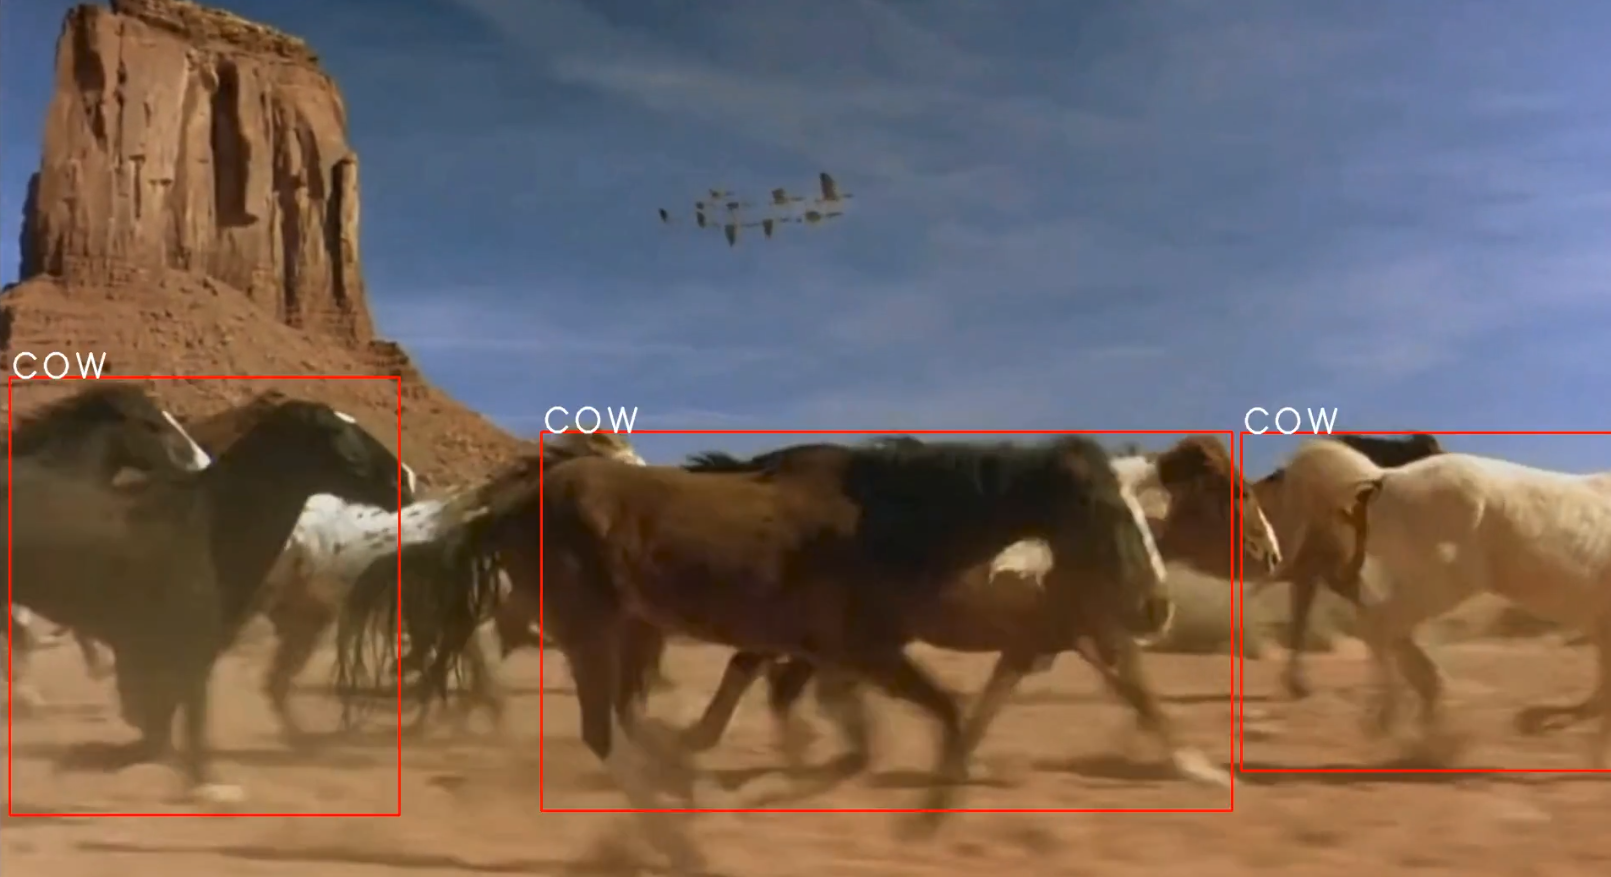

In [50]:
Image(filename='az2.png')

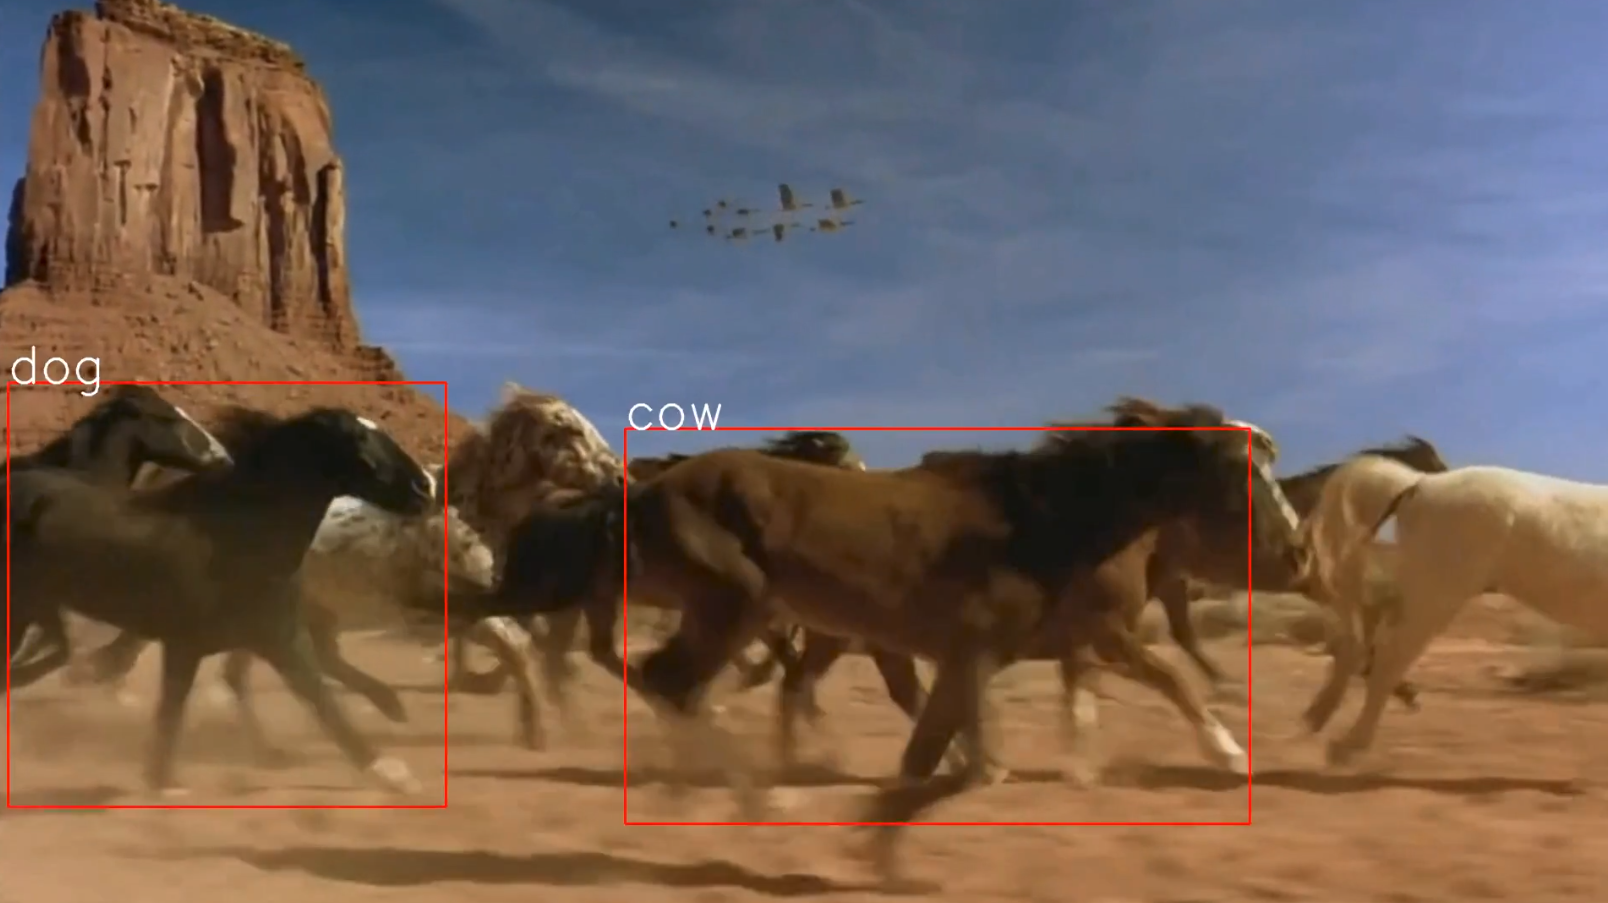

In [51]:
Image(filename='az3.png')

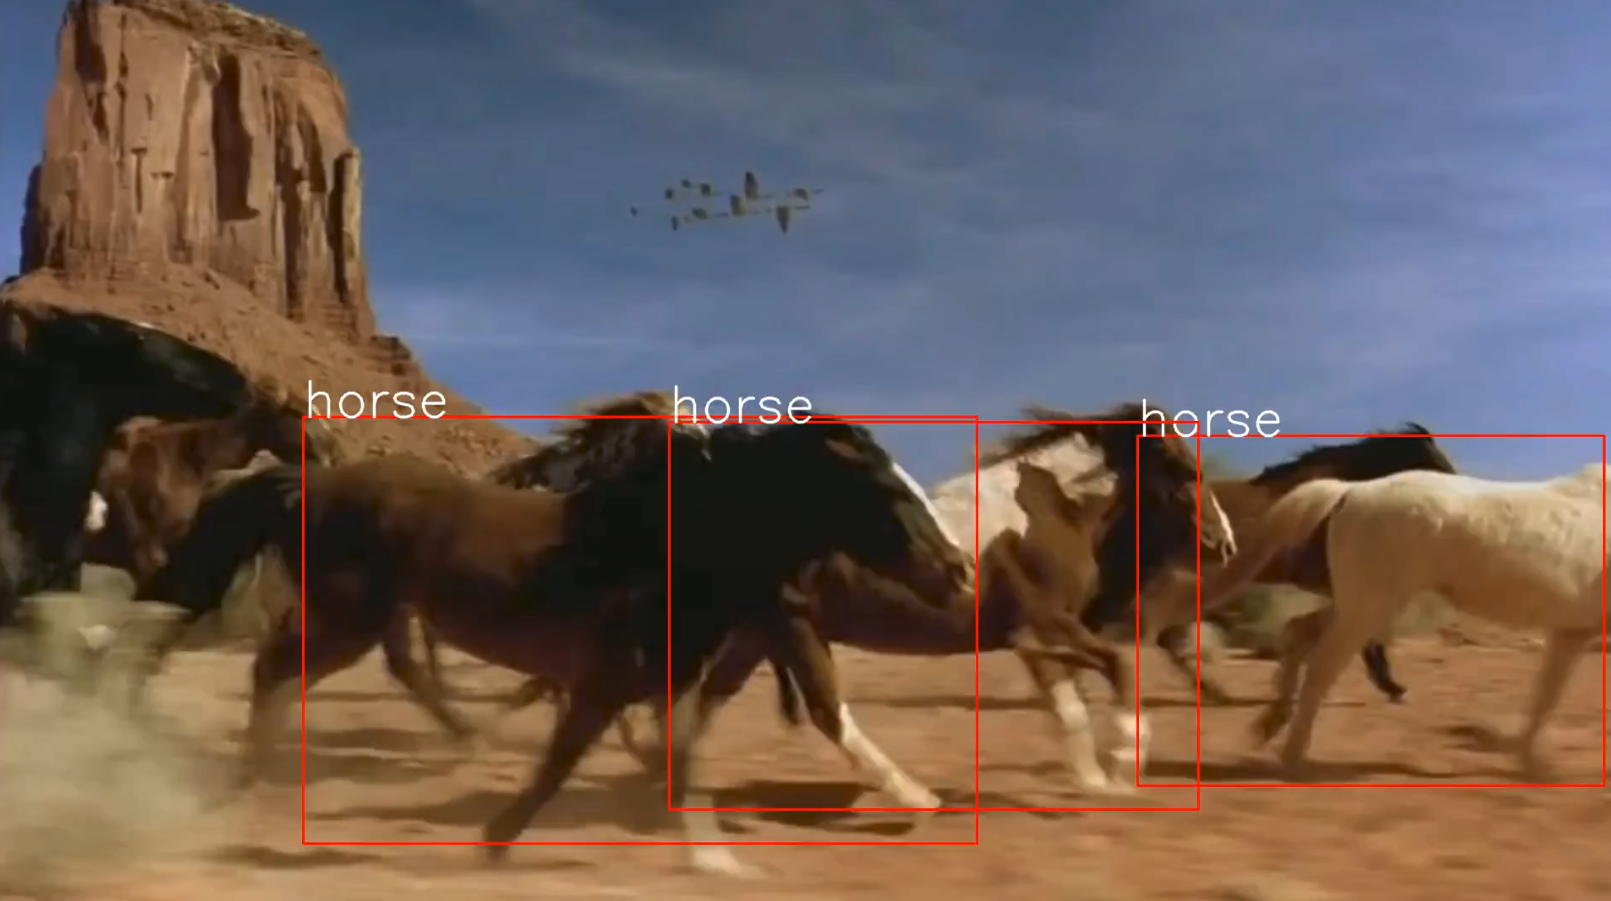

In [52]:
Image(filename='az4.png')

In [47]:
HTML('<iframe width="560" height="315" src="output.mp4" frameborder="0" allowfullscreen></iframe>')





## But as you can notice the result the model is not perfect sometimes it detects the cow and sometimes the dog